In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patheffects
from matplotlib import ticker

import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')
pe = patheffects.withStroke(foreground="white", linewidth=5)
SOURCEDIR = r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\pp_baseline"

In [2]:
ARIS = [1, 2, 3, 4, 5, 10, 15, 20, 30, 35, 40, 45, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 2500, 5000, 10000]
AEP = 1.0 - np.exp(-1.0/np.array(ARIS))
df = pd.read_csv(os.path.join(SOURCEDIR, "structural_mean_LGA.csv"))
lossdf = pd.read_csv(os.path.join(SOURCEDIR, "structural_loss_sum_LGA.csv"))

In [3]:
LGAs = {31000: "Brisbane", 33430:"Gold Coast", 35010: "Moreton Bay", 35740:"Noosa", 36250:"Redland", 36720:"Sunshine Coast"}
df = df[df.LGA_CODE.isin(LGAs.keys())]
lossdf = lossdf[lossdf.LGA_CODE.isin(LGAs.keys())]

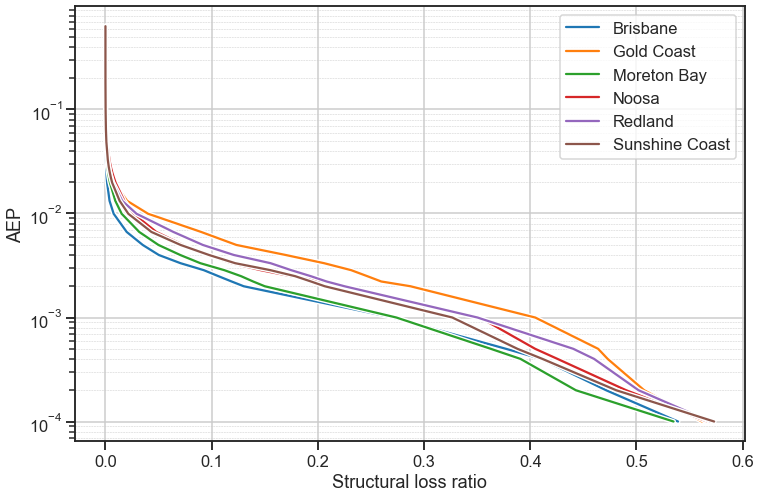

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in df.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogy(x, AEP, path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.legend()
ax.set_ylabel("AEP")
ax.set_xlabel("Structural loss ratio")
plt.savefig(os.path.join(SOURCEDIR, "structural_mean_LGA_EPcurve.png"), bbox_inches="tight")

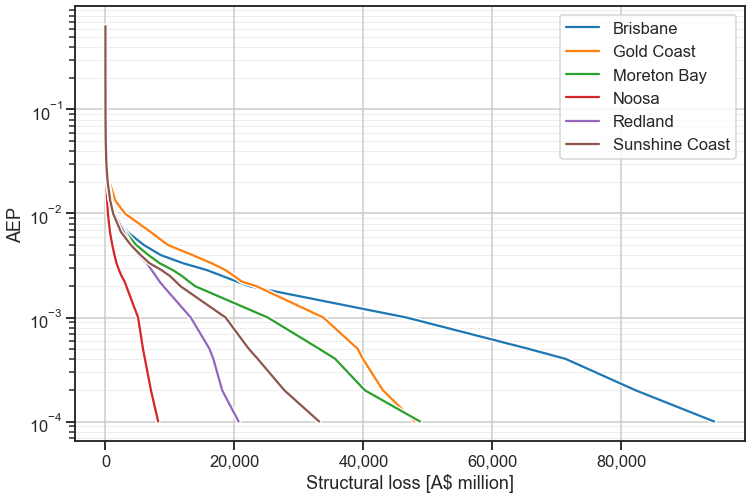

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in lossdf.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogy(x, AEP, path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.legend()
ax.set_ylabel("AEP")
ax.set_xlabel("Structural loss [A$ million]")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig(os.path.join(SOURCEDIR, "structural_loss_sum_LGA_EPcurve.png"), bbox_inches="tight")

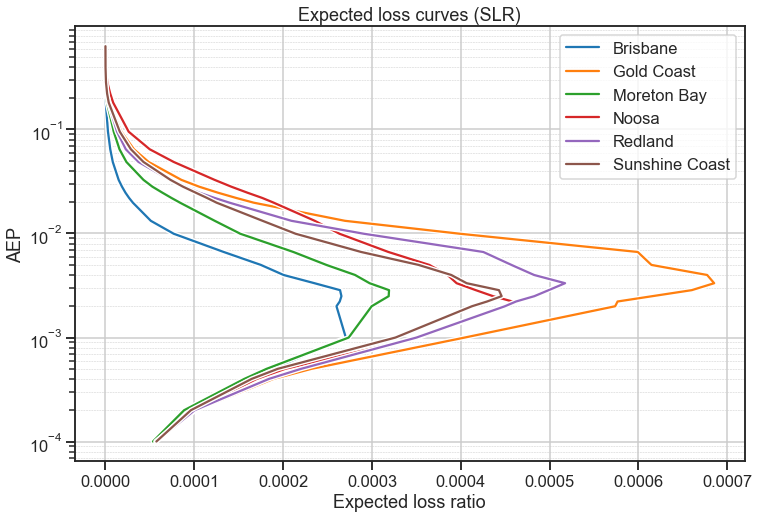

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in df.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogy(x*AEP, AEP, path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.set_title("Expected loss curves (SLR)")
ax.legend()
ax.set_ylabel("AEP")
ax.set_xlabel("Expected loss ratio")
plt.savefig(os.path.join(SOURCEDIR, "structural_mean_LGA_ELcurve.png"), bbox_inches="tight")

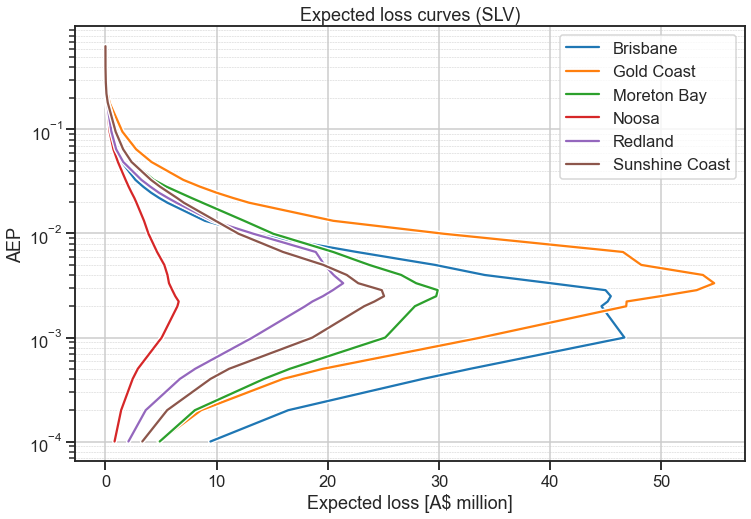

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in lossdf.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogy(x*AEP, AEP, path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.set_title("Expected loss curves (SLV)")
ax.legend()
ax.set_ylabel("AEP")
ax.set_xlabel("Expected loss [A$ million]")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig(os.path.join(SOURCEDIR, "structural_loss_sum_LGA_ELcurve.png"), bbox_inches="tight")

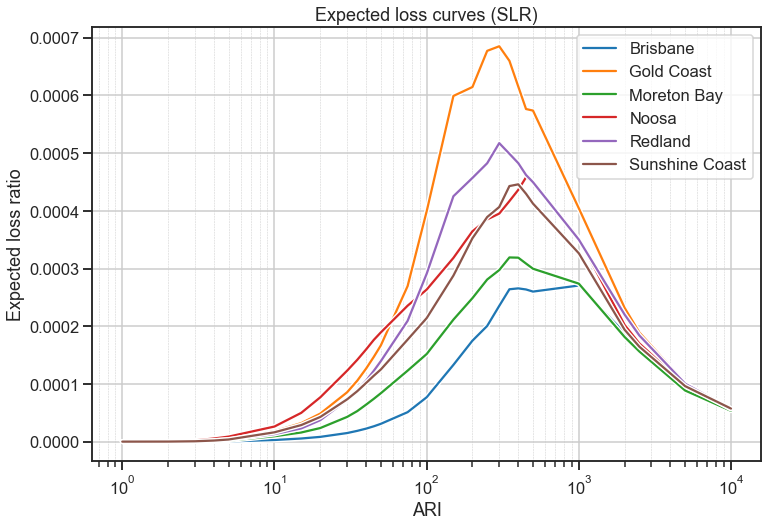

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in df.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogx(ARIS, x*AEP, path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.set_title("Expected loss curves (SLR)")
ax.legend()
ax.set_xlabel("ARI")
ax.set_ylabel("Expected loss ratio")
plt.savefig(os.path.join(SOURCEDIR, "structural_mean_LGA_ELcurveARI.png"), bbox_inches="tight")

To compare the relative dominant loss-causing event, we plot the cumulative expected loss level, normalised by the AAL. Thus all values are in the range [0, 1]. A curve further to the left indicates a greater portion of the loss accumulates at higher exceedance probabilities (shorter return periods). So for the plot below, the losses in Noosa accumulate as a result of more frequent events than other LGAs. Brisbane is the reverse - more extreme events are more dominant in the evaluation of average annual losses. The equivalent figure for structural loss values is qualitatively similar, with Noosa to the left and Brisbane well to the right. The remaining LGAs are more tightly clustered than in the SLV cumulative expected loss values.

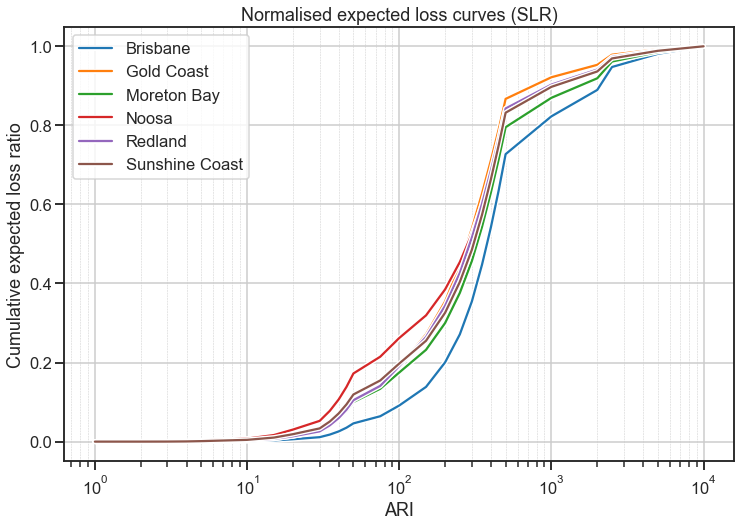

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in df.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogx(ARIS, np.cumsum(x*AEP)/np.sum(x*AEP), path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.set_title("Normalised expected loss curves (SLR)")
ax.legend()
ax.set_xlabel("ARI")
ax.set_ylabel("Cumulative expected loss ratio")
plt.savefig(os.path.join(SOURCEDIR, "structural_mean_LGA_CELcurveARI.png"), bbox_inches="tight")

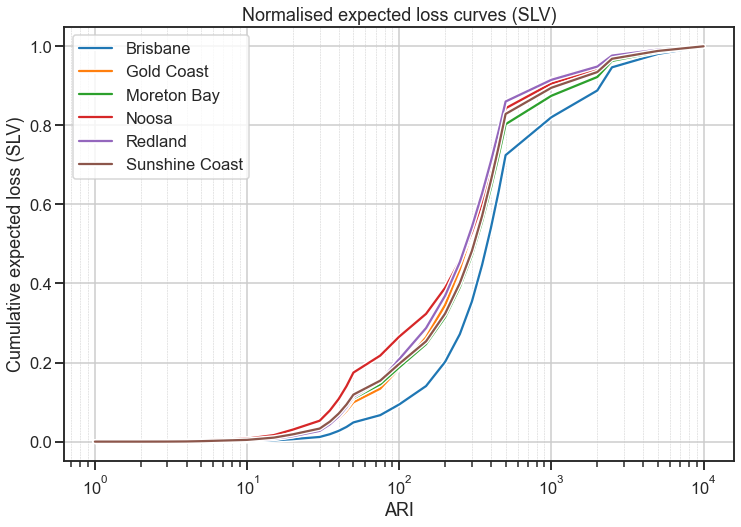

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in lossdf.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogx(ARIS, np.cumsum(x*AEP)/np.sum(x*AEP), path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.set_title("Normalised expected loss curves (SLV)")
ax.legend()
ax.set_xlabel("ARI")
ax.set_ylabel("Cumulative expected loss (SLV)")
plt.savefig(os.path.join(SOURCEDIR, "structural_loss_sum_LGA_CELcurveARI.png"), bbox_inches="tight")